In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import koreanize_matplotlib
from wordcloud import WordCloud, STOPWORDS
import kagglehub
import os
import zipfile
import shutil
import plotly.express as px



###  /home/yj/dev_ws/project_UFO/data -> 자신의 환경에 맞게 수정

In [68]:
# 저장할 경로
save_path = '/home/yj/dev_ws/project_UFO/data'    #  /home/yj/dev_ws/project_UFO/data -> 자신의 환경에 맞게 수정
os.makedirs(save_path, exist_ok=True)

# dataset 다운로드 (최신 버전)
downloaded = kagglehub.dataset_download("NUFORC/ufo-sightings", force_download=True)

# 다운로드 결과 확인
if os.path.isdir(downloaded):
    # 이미 폴더라면, 안에 있는 파일을 save_path로 복사
    for file in os.listdir(downloaded):
        shutil.copy(os.path.join(downloaded, file), save_path)
    print(f"Dataset folder copied to: {save_path}")
else:
    # zip 파일이면 이동 후 압축 해제
    shutil.move(downloaded, os.path.join(save_path, 'ufo-sightings.zip'))
    with zipfile.ZipFile(os.path.join(save_path, 'ufo-sightings.zip'), 'r') as zip_ref:
        zip_ref.extractall(save_path)
    print(f"Dataset downloaded and extracted to: {save_path}")


100%|██████████| 10.2M/10.2M [00:01<00:00, 8.96MB/s]

Extracting files...


Dataset folder copied to: /home/yj/dev_ws/project_UFO/data


In [69]:
raw_data = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


/tmp/ipykernel_4850/3585133660.py:1: DtypeWarning:

Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.



In [70]:
UFO = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv', header=0, low_memory=False)
UFO.head(30)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167


/tmp/ipykernel_4850/1926487648.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




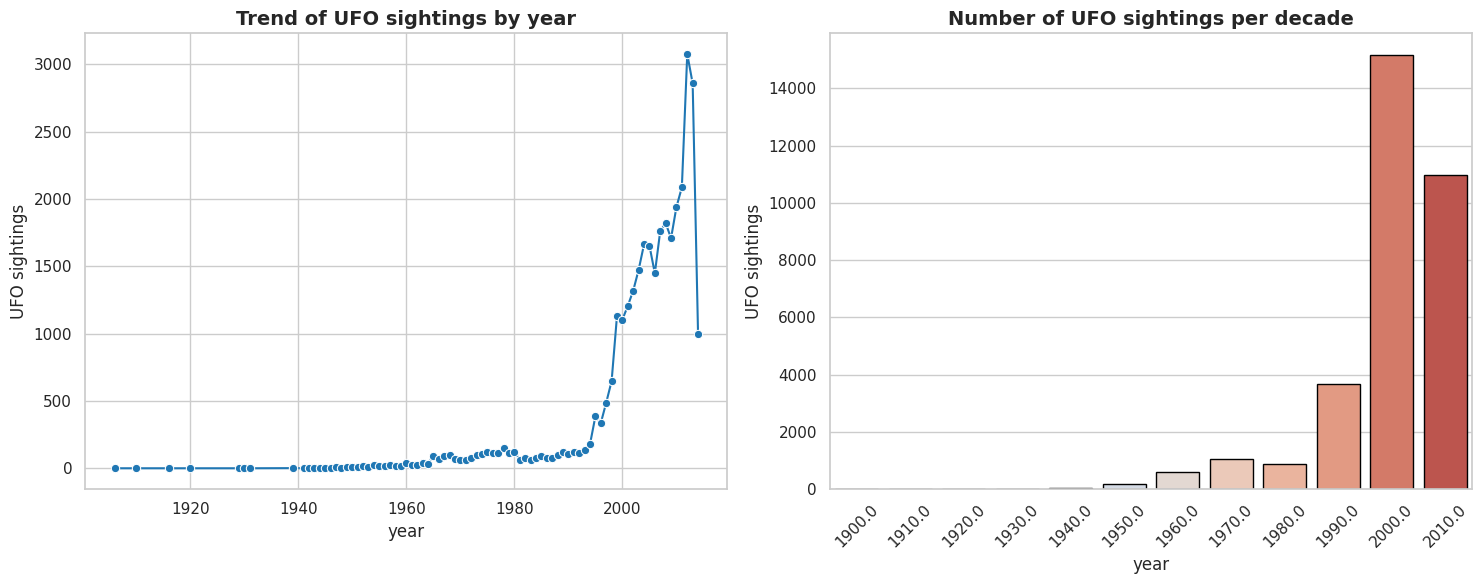

In [71]:

# datetime 컬럼을 날짜형으로 변환
UFO['datetime'] = pd.to_datetime(UFO['datetime'], errors='coerce', dayfirst=True)
UFO['year'] = UFO['datetime'].dt.year

# 유효한 연도만 필터링 (1900~2025)
UFO = UFO[(UFO['year'] >= 1900) & (UFO['year'] <= 2025)]

# 연도별 / 10년 단위 집계
yearly_counts = UFO['year'].value_counts().sort_index()
UFO['decade'] = (UFO['year'] // 10) * 10
decade_counts = UFO['decade'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(15, 6))

# 연도별 그래프
plt.subplot(1, 2, 1)
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values,
             marker='o', color='#1f77b4')
plt.title('Trend of UFO sightings by year', fontsize=14, fontweight='bold')
plt.xlabel('year')
plt.ylabel('UFO sightings')

# 10년 단위 그래프
plt.subplot(1, 2, 2)
sns.barplot(x=decade_counts.index.astype(str), y=decade_counts.values,
            palette='coolwarm', edgecolor='black')
plt.title('Number of UFO sightings per decade', fontsize=14, fontweight='bold')
plt.xlabel('year')
plt.ylabel('UFO sightings')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 1990~ 이후로 급격하게 목격사례가 증가하고 있습니다. -> 밀레니엄 시대를 지나면 UFO와 같은 초자연적 사례에 대한 관심이 높아지는 사회적 현상?

In [72]:
# country 컬럼: 종류와 몇 종인지
country_counts = UFO['country'].value_counts(dropna=False)
print("Country 종류 개수:", UFO['country'].nunique(dropna=True))
print("Country 종류별 개수:\n", country_counts)

print("\n" + "="*50 + "\n")

# shape 컬럼: 종류와 몇 종인지
shape_counts = UFO['shape'].value_counts(dropna=False)
print("Shape 종류 개수:", UFO['shape'].nunique(dropna=True))
print("Shape 종류별 개수:\n", shape_counts)

print("\n" + "="*50 + "\n")

# duration (seconds) 컬럼: country별 평균
# 먼저 숫자로 변환 (변환 실패는 NaN 처리)
UFO['duration (seconds)'] = pd.to_numeric(UFO['duration (seconds)'], errors='coerce')

duration_mean_by_country = UFO.groupby('country')['duration (seconds)'].mean().sort_values(ascending=False)
print("Country별 평균 duration (seconds):\n", duration_mean_by_country)

Country 종류 개수: 5
Country 종류별 개수:
 country
us     26300
NaN     3931
ca      1148
gb       815
au       250
de        35
Name: count, dtype: int64


Shape 종류 개수: 23
Shape 종류별 개수:
 shape
light        6687
triangle     3108
circle       3086
fireball     2553
other        2344
sphere       2255
unknown      2196
disk         2093
oval         1571
formation    1014
cigar         854
NaN           766
changing      742
cylinder      545
rectangle     509
flash         506
diamond       437
chevron       360
egg           322
teardrop      307
cone          125
cross          95
delta           3
pyramid         1
Name: count, dtype: int64


Country별 평균 duration (seconds):
 country
gb    122197.659018
ca     73097.531098
au      6856.010000
us      5517.333039
de      3011.142857
Name: duration (seconds), dtype: float64


/tmp/ipykernel_4850/1812768153.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




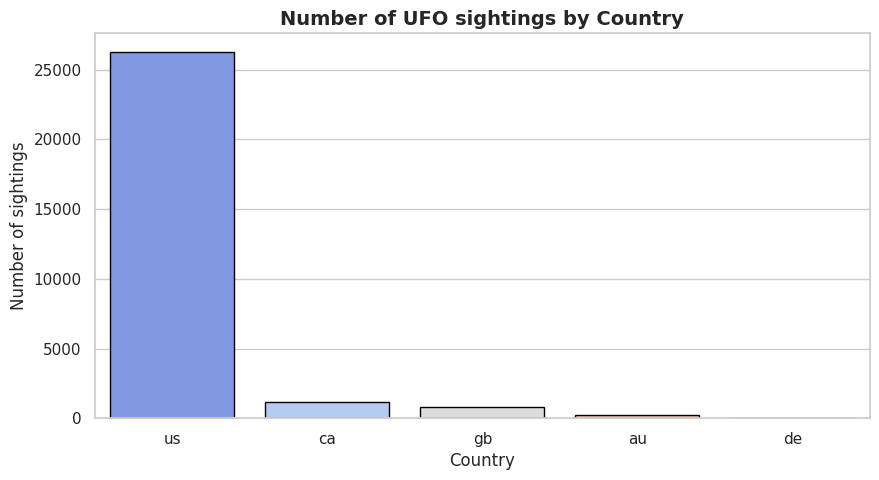

/tmp/ipykernel_4850/1812768153.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




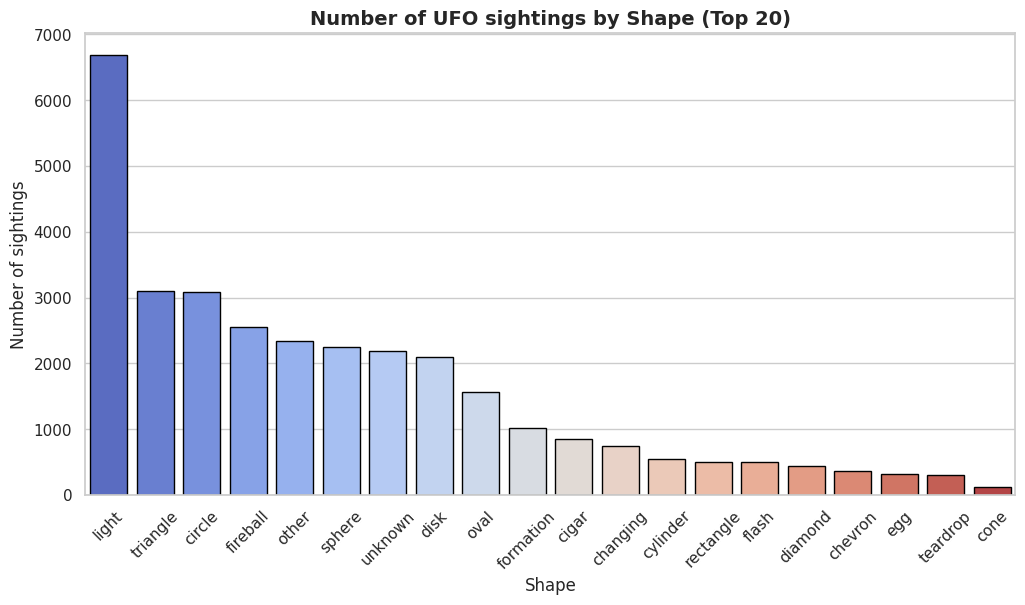

/tmp/ipykernel_4850/1812768153.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




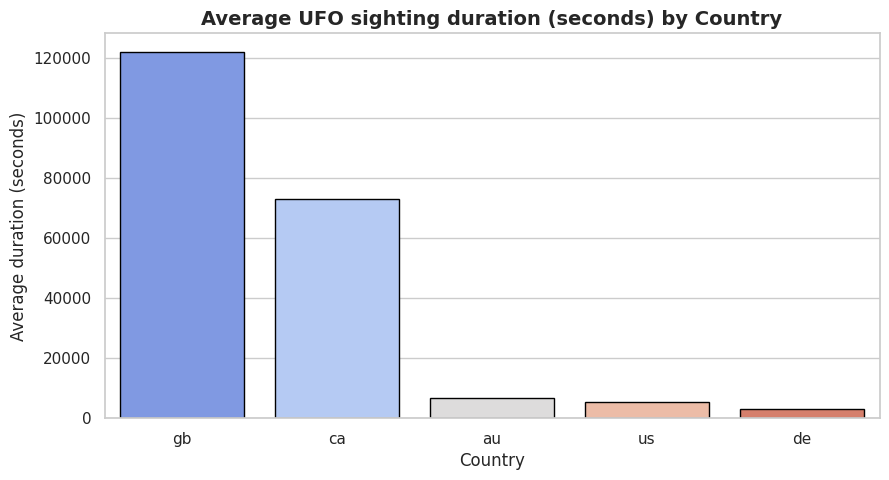

In [73]:
sns.set(style='whitegrid', palette='coolwarm')

# duration (seconds) 숫자로 변환
UFO['duration (seconds)'] = pd.to_numeric(UFO['duration (seconds)'], errors='coerce')

# Country 종류별 개수
country_counts = UFO['country'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='coolwarm', edgecolor='black')
plt.title('Number of UFO sightings by Country', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Number of sightings')
plt.show()

# Shape 종류별 개수
shape_counts = UFO['shape'].value_counts().head(20)  # 상위 20개만 표시
plt.figure(figsize=(12,6))
sns.barplot(x=shape_counts.index, y=shape_counts.values, palette='coolwarm', edgecolor='black')
plt.title('Number of UFO sightings by Shape (Top 20)', fontsize=14, fontweight='bold')
plt.xlabel('Shape')
plt.ylabel('Number of sightings')
plt.xticks(rotation=45)
plt.show()

# Duration(seconds) Country별 평균
duration_mean_by_country = UFO.groupby('country')['duration (seconds)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=duration_mean_by_country.index, y=duration_mean_by_country.values,
            palette='coolwarm', edgecolor='black')
plt.title('Average UFO sighting duration (seconds) by Country', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Average duration (seconds)')
plt.show()

### 
1. 국가별 UFO 목격 사례
미국이 압도적으로 높음 -> 미국 문화권에서 UFO에 대한 관심이 높다?

2. UFO의 형태별 사례 분류
빛 형태가 가장 많고 2순위부터는 차이가 그렇게 크지는 않지만 삼각형 형태가 2위 인것은 꽤 특이하다

3. 국가별 UFO 목격 지속시간 평균
561행에 duration 값(97836000 (31년))이 너무 큰 데이터때문에 gb값이 튄 듯 합니다.

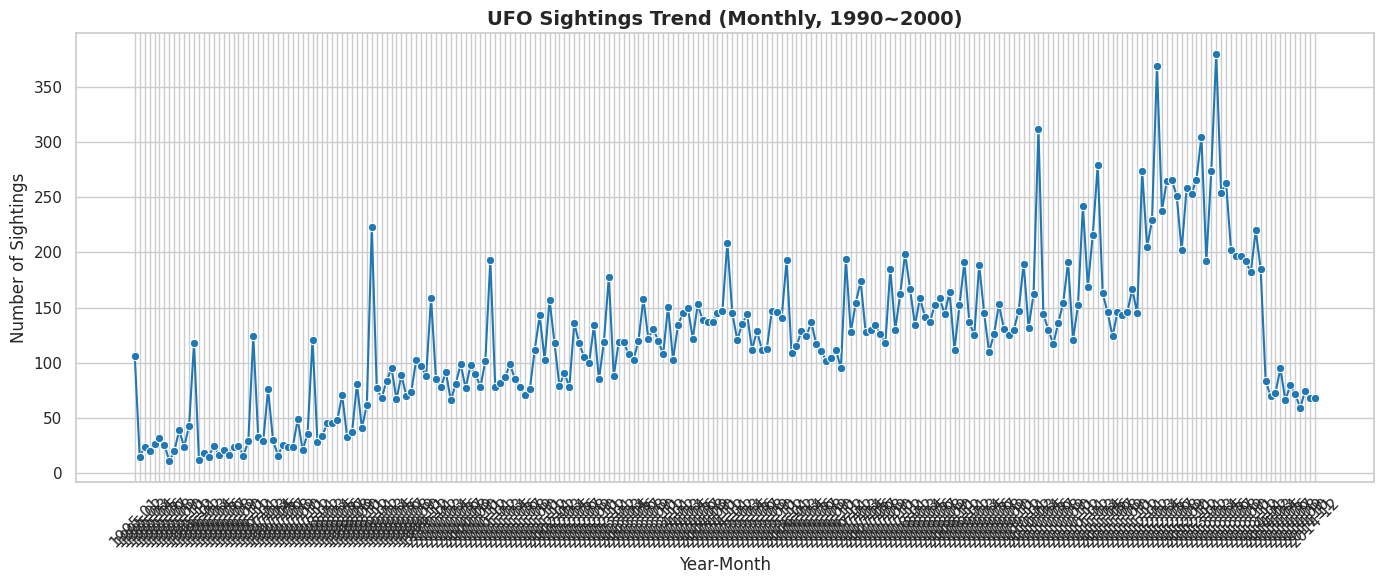

In [74]:
# Seaborn 스타일
sns.set(style='whitegrid', palette='coolwarm')

# datetime 컬럼을 날짜형으로 변환
UFO['datetime'] = pd.to_datetime(UFO['datetime'], errors='coerce', dayfirst=True)

# 1995~2014 사이 데이터만 필터링
UFO = UFO[(UFO['datetime'].dt.year >= 1995) & (UFO['datetime'].dt.year <= 2014)]

# 연-월 단위 컬럼 생성
UFO['year_month'] = UFO['datetime'].dt.to_period('M')

# 월별 UFO 목격 건수 집계
monthly_counts = UFO['year_month'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(14,6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o', color='#1f77b4')
plt.title('UFO Sightings Trend (Monthly, 1990~2000)', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 뭔가 특이한 점이 있긴 한데 아래쪽이 너무 촘촘해서 보이질 않음.

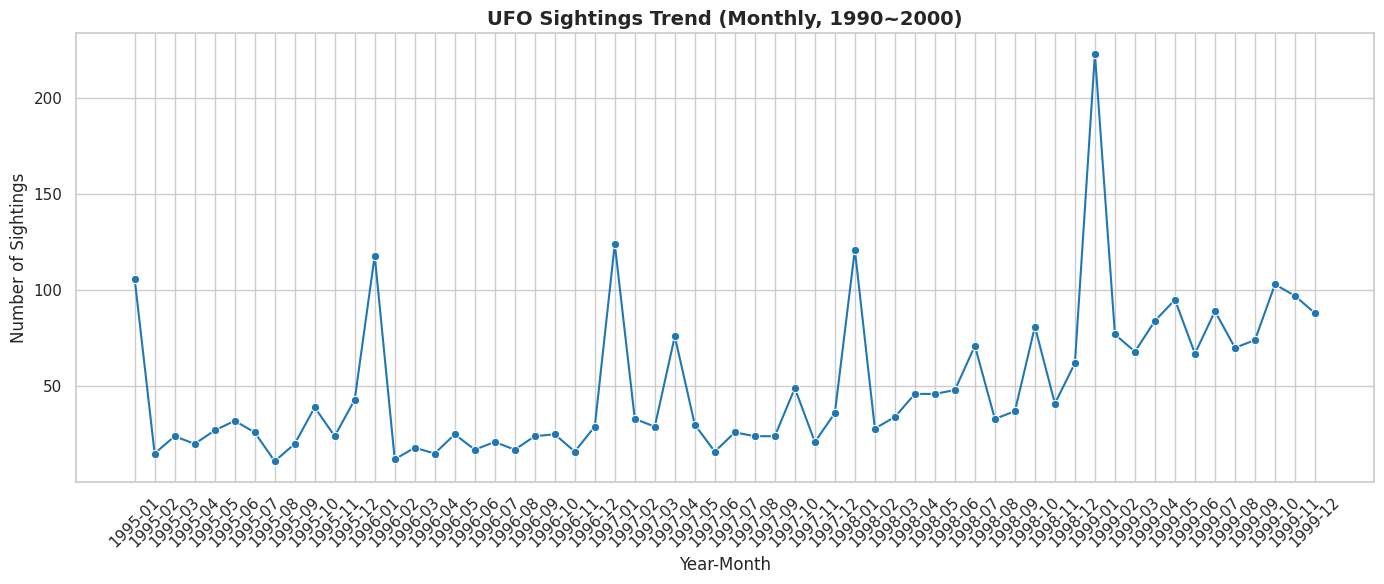

In [75]:
# Seaborn 스타일
sns.set(style='whitegrid', palette='coolwarm')

# 1990~2000 사이 데이터만 필터링
UFO = UFO[(UFO['datetime'].dt.year >= 1995) & (UFO['datetime'].dt.year <= 1999)]

# 연-월 단위 컬럼 생성
UFO['year_month'] = UFO['datetime'].dt.to_period('M')

# 월별 UFO 목격 건수 집계
monthly_counts = UFO['year_month'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(14,6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o', color='#1f77b4')
plt.title('UFO Sightings Trend (Monthly, 1990~2000)', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 이상하게 12월 달에만 UFO목격담이 많다.

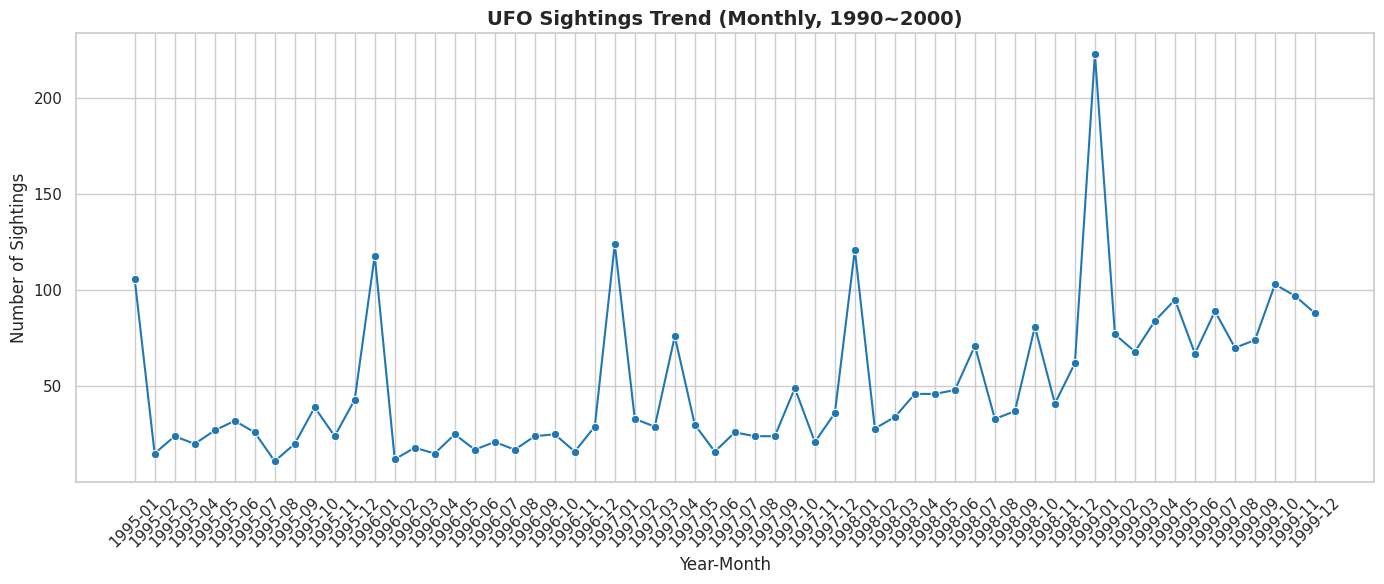

In [76]:
# Seaborn 스타일
sns.set(style='whitegrid', palette='coolwarm')

# 1990~2000 사이 데이터만 필터링
UFO = UFO[(UFO['datetime'].dt.year >= 1995) & (UFO['datetime'].dt.year <= 2000)]

# 연-월 단위 컬럼 생성
UFO['year_month'] = UFO['datetime'].dt.to_period('M')

# 월별 UFO 목격 건수 집계
monthly_counts = UFO['year_month'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(14,6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o', color='#1f77b4')
plt.title('UFO Sightings Trend (Monthly, 1990~2000)', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

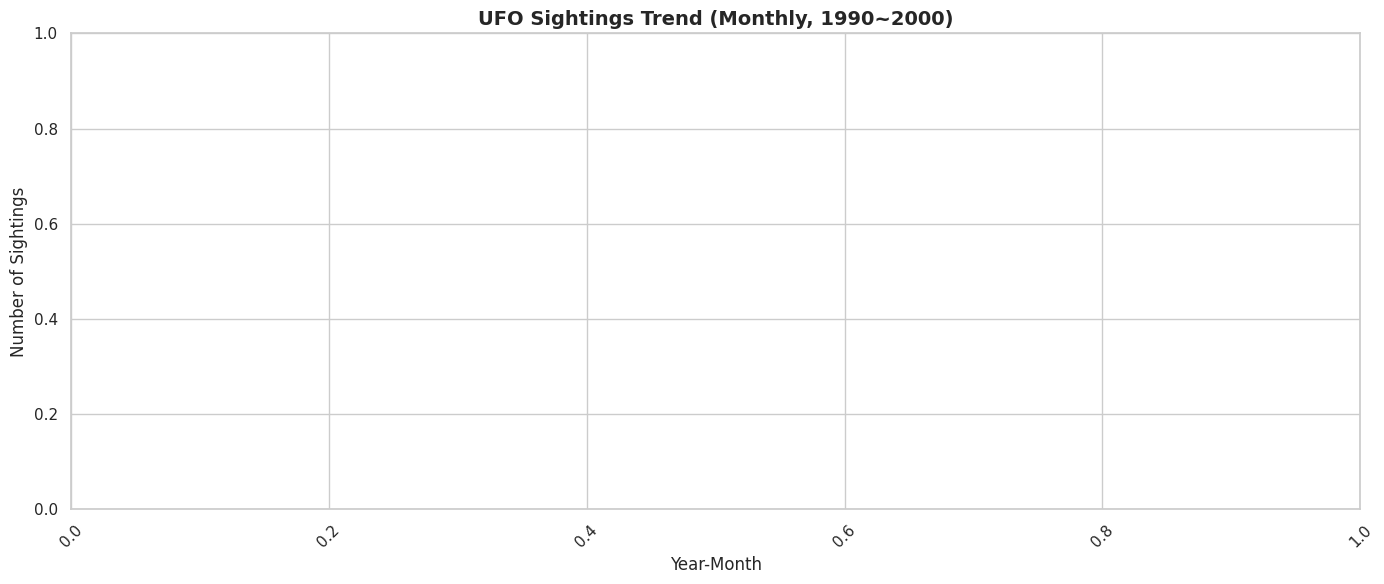

In [77]:
# Seaborn 스타일
sns.set(style='whitegrid', palette='coolwarm')

# 1990~2000 사이 데이터만 필터링
UFO = UFO[(UFO['datetime'].dt.year >= 2001) & (UFO['datetime'].dt.year <= 2002)]

# 연-월 단위 컬럼 생성
UFO['year_month'] = UFO['datetime'].dt.to_period('M')

# 월별 UFO 목격 건수 집계
monthly_counts = UFO['year_month'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(14,6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o', color='#1f77b4')
plt.title('UFO Sightings Trend (Monthly, 1990~2000)', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 911테러 당시 뉴스영상에 UFO가 찍혔다는 소문으로 인해 UFO목격 신고가 일시적으로 증가했다는 얘기가 있는데 실제로 조금 증가한것은 확인된다.

In [78]:
# comments 컬럼 합치기
text = " ".join(comment for comment in UFO['comments'].dropna())

# 불용어(Stopwords) 설정
stopwords = set(STOPWORDS)
# 필요하면 'the', 'a', 'and' 같은 일반 단어 추가
stopwords.update(['the', 'a', 'and', 'of', 'to', 'in', 'on', 'with', 'is'])

# WordCloud 생성
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=stopwords,
    collocations=True,  # 동일 단어 묶기 허용
    colormap='coolwarm'
).generate(text)

# 시각화
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of UFO Comments', fontsize=20, fontweight='bold')
plt.show()


ValueError: We need at least 1 word to plot a word cloud, got 0.

### comments에 언급된 키워드 갯수 wordcloud

In [ ]:
# 데이터 불러오기
# 파일 경로가 로컬 환경에 맞게 지정되었는지 확인하세요.
file_path = '/home/yj/dev_ws/project_UFO/data/scrubbed.csv'
df = pd.read_csv(file_path, low_memory=False)

# 'country' 컬럼 전처리 (대문자로 통일)
df['country'] = df['country'].str.upper()

# 국가별 목격 사례 시각화 (세계 지도)
print("--- 🗺️ 국가별 목격 사례 시각화 ---")

# 국가별 목격 횟수 계산
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country_iso2', 'count']

# ISO 2 코드를 Plotly가 지원하는 ISO 3 코드로 변환하는 매핑 테이블 정의
iso2_to_iso3 = {
    'US': 'USA',  # United States
    'CA': 'CAN',  # Canada
    'GB': 'GBR',  # United Kingdom
    'AU': 'AUS',  # Australia
    'DE': 'DEU',  # Germany
    # 데이터셋에 포함된 기타 국가 코드가 있다면 여기에 추가합니다.
}

# ISO-3 코드 컬럼 추가 및 결측치 제거
country_counts['country_iso3'] = country_counts['country_iso2'].map(iso2_to_iso3)
country_counts_mapped = country_counts.dropna(subset=['country_iso3'])


# Plotly Choropleth 지도 생성
fig_map = px.choropleth(
    country_counts_mapped, # 매핑된 데이터를 사용
    locations='country_iso3',  # ISO 3 코드 컬럼 지정
    color='count',        
    hover_name='country_iso2', # 마우스를 올렸을 때 ISO 2 코드를 표시
    color_continuous_scale=px.colors.sequential.Plasma, 
    title='UFO numbers by Country',
    locationmode='ISO-3' # **ISO-3로 변경하여 ValueError 해결**
)

# 지도를 웹 브라우저로 출력
fig_map.show()


--- 🗺️ 국가별 목격 사례 시각화 ---


### 미국 >>>> 호주 캐나다 유럽권 >> 기타 국가들 이라서 미국외에는 큰 의미가 없다고 판단된다.

--- 🛸 국가별 Top 5 목격 형태 ---

[US]
   shape  count
   light  13473
triangle   6549
 unknown   6120
  circle   6118
fireball   5148

[CA]
   shape  count
   light    655
  circle    284
triangle    268
 unknown    252
   other    241

[GB]
   shape  count
   light    361
  circle    243
triangle    169
  sphere    158
 unknown    142

[AU]
   shape  count
   light    119
  circle     62
    disk     50
triangle     43
   other     40

[DE]
   shape  count
   light     20
  circle     10
 unknown     10
triangle      9
   other      9


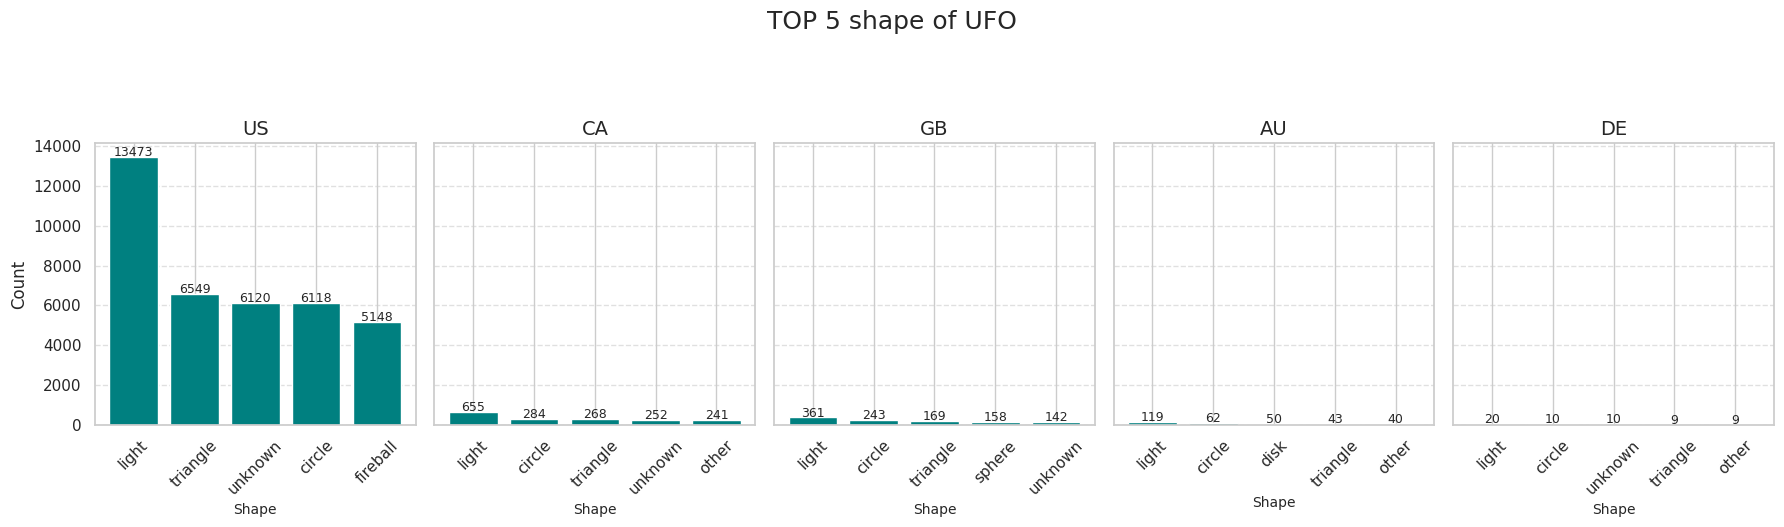

In [ ]:
# 데이터 불러오기 (이전 코드에서 로드된 df 사용을 가정)
file_path = '/home/yj/dev_ws/project_UFO/data/scrubbed.csv'
df = pd.read_csv(file_path, low_memory=False)

# 'country' 및 'shape' 컬럼 전처리
df['country'] = df['country'].str.upper()
df['shape'] = df['shape'].fillna('unknown').str.lower()

# 주요 5개 국가만 필터링
main_countries = ['US', 'CA', 'GB', 'AU', 'DE']
df_filtered = df[df['country'].isin(main_countries)]

# 국가별, 형태별 집계 및 Top 5 형태 추출
# 국가 및 형태별 목격 횟수를 집계
country_shape_counts = df_filtered.groupby(['country', 'shape']).size().reset_index(name='count')

# 각 국가별 Top 5 형태를 저장할 딕셔너리 초기화
top5_shapes_per_country = {}

for country in main_countries:
    # 해당 국가의 데이터만 필터링
    country_data = country_shape_counts[country_shape_counts['country'] == country]
    
    # 'count' 기준으로 내림차순 정렬 후 상위 5개 추출
    top5 = country_data.sort_values(by='count', ascending=False).head(5)
    top5_shapes_per_country[country] = top5

print("--- 🛸 국가별 Top 5 목격 형태 ---")
for country, data in top5_shapes_per_country.items():
    print(f"\n[{country}]")
    print(data[['shape', 'count']].to_string(index=False))


# 서브플롯(Subplots)을 이용한 시각화
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 5), sharey=True)
fig.suptitle('TOP 5 shape of UFO', fontsize=18, y=1.05)

# 서브플롯에 데이터 플로팅
for i, country in enumerate(main_countries):
    # i: 0부터 4, country: 'US', 'CA', 'GB', 'AU', 'DE'
    ax = axes[i]
    data = top5_shapes_per_country[country]
    
    # 막대 그래프 생성
    ax.bar(data['shape'], data['count'], color='teal')
    
    # 각 막대 위에 횟수 표시
    for j, count in enumerate(data['count']):
        ax.text(j, count + 50, str(count), ha='center', fontsize=9)
        
    ax.set_title(country, fontsize=14)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Shape', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# y축 레이블은 첫 번째 서브플롯에만 표시
axes[0].set_ylabel('Count', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95]) # supertitle 공간 확보
plt.show()

In [ ]:
df = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv', low_memory=False)

In [ ]:
df.head()
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [ ]:

# datetime 컬럼을 날짜형으로 변환
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

# 요일 컬럼 생성 (Monday, Tuesday ...)
df["weekday"] = df["datetime"].dt.day_name()

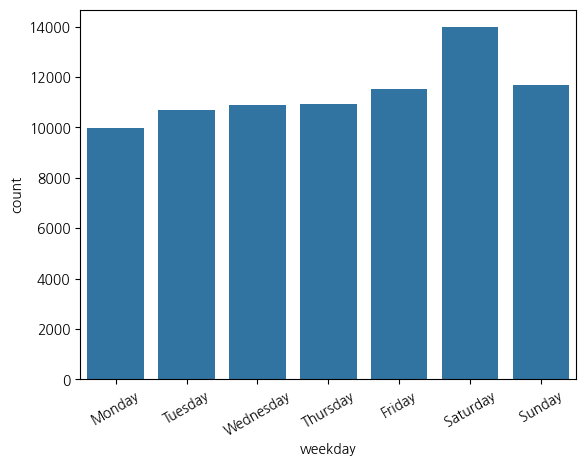

In [ ]:
sns.countplot(data=df, x="weekday",
              order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.xticks(rotation=30)
plt.show()

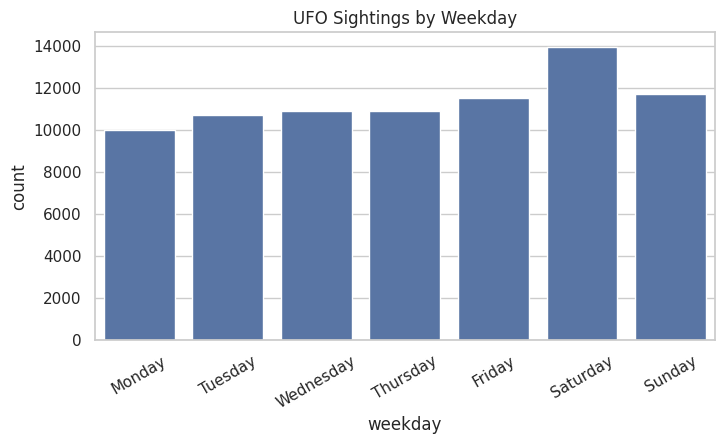

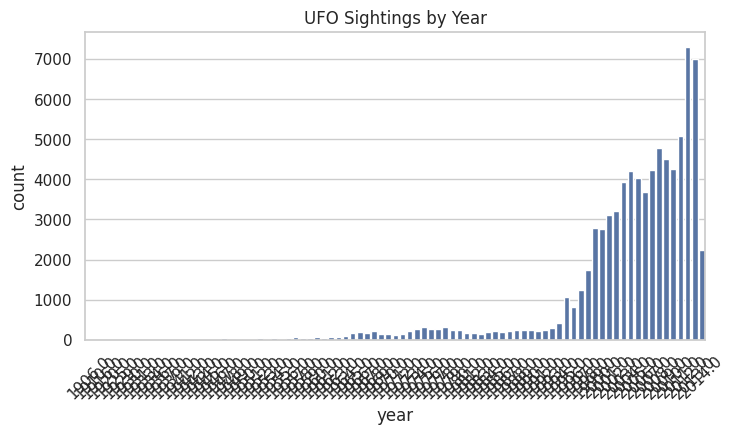

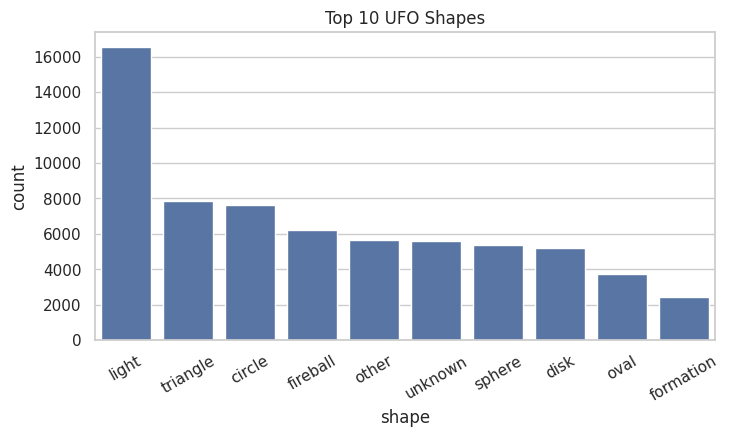

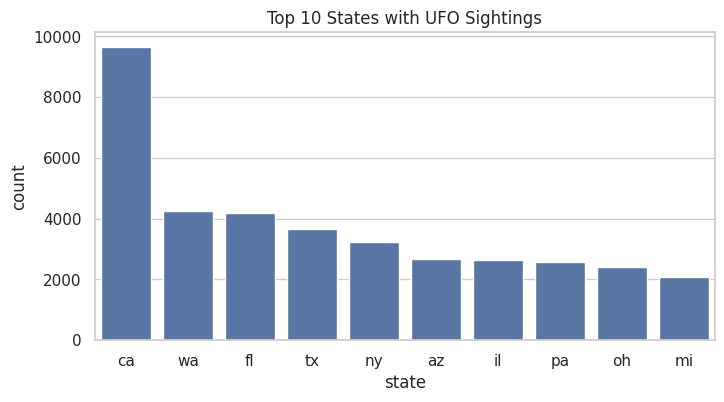

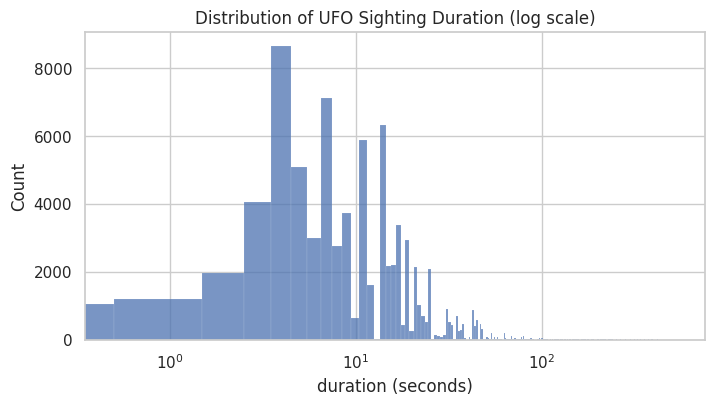

In [ ]:
sns.set_theme(style="whitegrid")

# 요일별 목격 빈도
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="weekday",
              order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("UFO Sightings by Weekday")
plt.xticks(rotation=30)
plt.show()

# 연도별 목격 추세
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="year")
plt.title("UFO Sightings by Year")
plt.xticks(rotation=45)
plt.show()

# Shape(목격 형태)별 빈도 Top 10
top_shape = df["shape"].value_counts().index[:10]
plt.figure(figsize=(8,4))
sns.countplot(data=df[df["shape"].isin(top_shape)], x="shape",
              order=top_shape)
plt.title("Top 10 UFO Shapes")
plt.xticks(rotation=30)
plt.show()

# State별 목격 빈도 Top 10
top_state = df["state"].value_counts().index[:10]
plt.figure(figsize=(8,4))
sns.countplot(data=df[df["state"].isin(top_state)], x="state",
              order=top_state)
plt.title("Top 10 States with UFO Sightings")
plt.show()

# 지속시간 (seconds) 분포
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="duration (seconds)", bins=50)
plt.xscale("log")  # 긴 tail 때문에 log scale 추천
plt.title("Distribution of UFO Sighting Duration (log scale)")
plt.show()

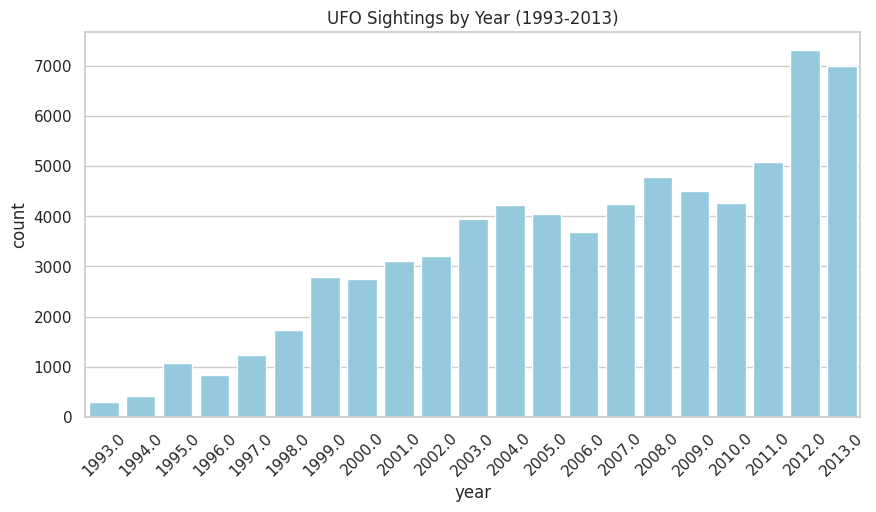

In [ ]:
df_filtered = df[(df['year'] >= 1993) & (df['year'] <= 2013)]

plt.figure(figsize=(10,5))
sns.countplot(data=df_filtered, x="year", color="skyblue")
plt.title("UFO Sightings by Year (1993-2013)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['state'].value_counts().head(20)

state
ca    9655
wa    4268
fl    4200
tx    3677
ny    3219
az    2689
il    2645
pa    2582
oh    2425
mi    2071
nc    1869
or    1845
on    1584
mo    1576
nj    1512
co    1505
va    1393
in    1386
ma    1358
ga    1347
Name: count, dtype: int64

In [ ]:
df['country'].value_counts()

country
us    65114
ca     3000
gb     1905
au      538
de      105
Name: count, dtype: int64

In [ ]:
print(df_state[["state","iso_code","count"]])

   state iso_code  count
0     CA    US-CA   9655
1     WA    US-WA   4268
2     FL    US-FL   4200
3     TX    US-TX   3677
4     NY    US-NY   3219
5     AZ    US-AZ   2689
6     IL    US-IL   2645
7     PA    US-PA   2582
8     OH    US-OH   2425
9     MI    US-MI   2071
10    NC    US-NC   1869
11    OR    US-OR   1845
12    MO    US-MO   1576
13    NJ    US-NJ   1512
14    CO    US-CO   1505
15    VA    US-VA   1393
16    IN    US-IN   1386
17    MA    US-MA   1358
18    GA    US-GA   1347


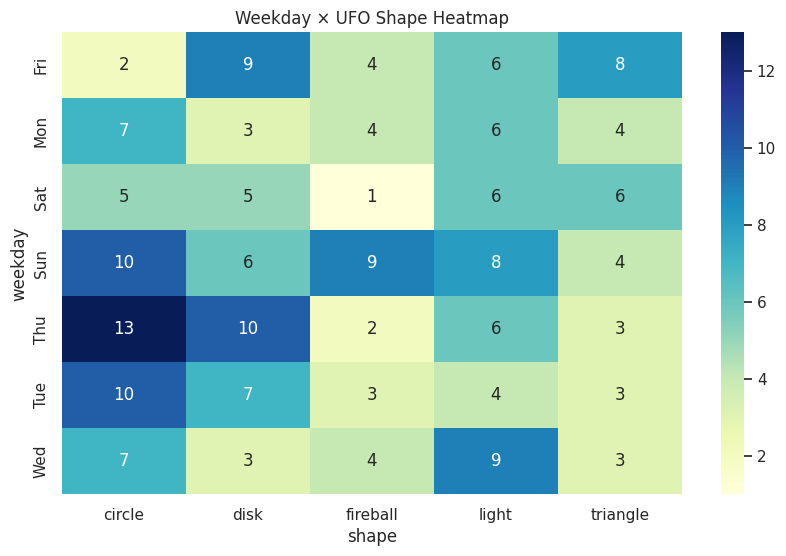

/tmp/ipykernel_4850/433107442.py:73: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



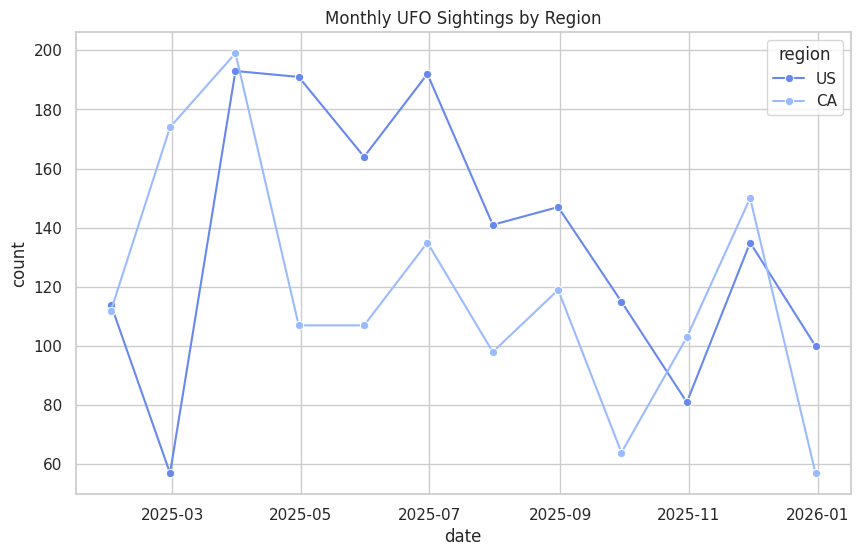

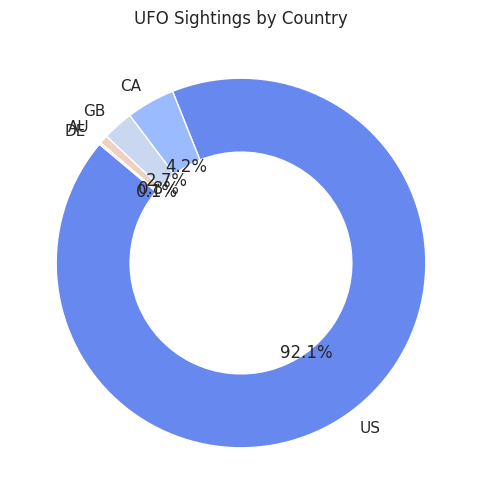

In [ ]:
import folium
import plotly.express as px

fig = px.choropleth(
    df_state,
    locations="iso_code",
    color="count",
    scope="usa",
    hover_name="state",
    color_continuous_scale="Reds",
    labels={"count":"UFO Sightings"},
    color_continuous_midpoint=np.median(df_state["count"])
)
fig.show()

state_data = {
    "state": ["CA", "WA", "FL", "TX", "NY", "AZ", "IL", "PA", "OH", "MI",
              "NC", "OR", "MO", "NJ", "CO", "VA", "IN", "MA", "GA"],
    "count": [9655, 4268, 4200, 3677, 3219, 2689, 2645, 2582, 2425, 2071,
              1869, 1845, 1576, 1512, 1505, 1393, 1386, 1358, 1347]
}
df_state = pd.DataFrame(state_data)

# 미국 주 중심 좌표 (Folium용)
state_coords = {
    "CA": [36.7783, -119.4179], "WA": [47.7511, -120.7401], "FL": [27.9944, -81.7603],
    "TX": [31.9686, -99.9018], "NY": [43.2994, -74.2179], "AZ": [34.0489, -111.0937],
    "IL": [40.6331, -89.3985], "PA": [41.2033, -77.1945], "OH": [40.4173, -82.9071],
    "MI": [44.1822, -84.5068], "NC": [35.7596, -79.0193], "OR": [43.8041, -120.5542],
    "MO": [37.9643, -91.8318], "NJ": [40.0583, -74.4057], "CO": [39.5501, -105.7821],
    "VA": [37.4316, -78.6569], "IN": [40.2672, -86.1349], "MA": [42.4072, -71.3824],
    "GA": [32.1656, -82.9001]
}
df_state["lat"] = df_state["state"].map(lambda x: state_coords.get(x, [None, None])[0])
df_state["lon"] = df_state["state"].map(lambda x: state_coords.get(x, [None, None])[1])

# Plotly용 ISO 코드
us_iso_codes = {k: f"US-{k}" for k in df_state["state"]}
df_state["iso_code"] = df_state["state"].map(us_iso_codes)

# country 데이터
country_data = {
    "country": ["US", "CA", "GB", "AU", "DE"],
    "count": [65114, 3000, 1905, 538, 105]
}
df_country = pd.DataFrame(country_data)
country_iso3 = {"US": "USA", "CA": "CAN", "GB": "GBR", "AU": "AUS", "DE": "DEU"}
df_country["iso_code"] = df_country["country"].map(country_iso3)

# 예시 weekday × shape 데이터 (랜덤 생성)
import numpy as np
shapes = ["circle", "triangle", "disk", "light", "fireball"]
weekdays = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
np.random.seed(42)
df_weekday_shape = pd.DataFrame({
    "weekday": np.random.choice(weekdays, 200),
    "shape": np.random.choice(shapes, 200)
})

# weekday × shape 교차표 히트맵 (새 방식)

plt.figure(figsize=(10,6))
cross = pd.crosstab(df_weekday_shape["weekday"], df_weekday_shape["shape"])
sns.heatmap(cross, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Weekday × UFO Shape Heatmap")
plt.show()


# 시계열 grouped lineplot (예시)

# 예시 시계열 데이터
dates = pd.date_range(start="2025-01-01", periods=12, freq="M")
df_time = pd.DataFrame({
    "date": np.tile(dates, 2),
    "count": np.random.randint(50,200,24),
    "region": ["US"]*12 + ["CA"]*12
})
plt.figure(figsize=(10,6))
sns.lineplot(data=df_time, x="date", y="count", hue="region", marker="o")
plt.title("Monthly UFO Sightings by Region")
plt.show()

# country donut chart (matplotlib)

plt.figure(figsize=(6,6))
plt.pie(df_country["count"], labels=df_country["country"], autopct="%1.1f%%", startangle=140, wedgeprops=dict(width=0.4))
plt.title("UFO Sightings by Country")
plt.show()


# Folium UFO sighting map

m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # 미국 중심
for _, row in df_state.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=row["count"]/2000,  # 크기 조정
        color="red",
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['state']}: {row['count']}"
    ).add_to(m)
m.save("ufo_folium_map.html")  # HTML 파일로 저장
m  # Jupyter Notebook에서 바로 출력 가능


# Plotly choropleth (state or country)

# 미국 주별 choropleth
fig = px.choropleth(df_state,
                    locations="iso_code",
                    color="count",
                    scope="usa",
                    hover_name="state",
                    color_continuous_scale="Reds",
                    labels={"count":"UFO Sightings"})
fig.show()

# 국가별 choropleth
fig2 = px.choropleth(df_country,
                     locations="iso_code",
                     color="count",
                     hover_name="country",
                     color_continuous_scale="Blues",
                     labels={"count":"UFO Sightings"})
fig2.show()

/tmp/ipykernel_4850/3802231556.py:3: DtypeWarning:

Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_4850/3802231556.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




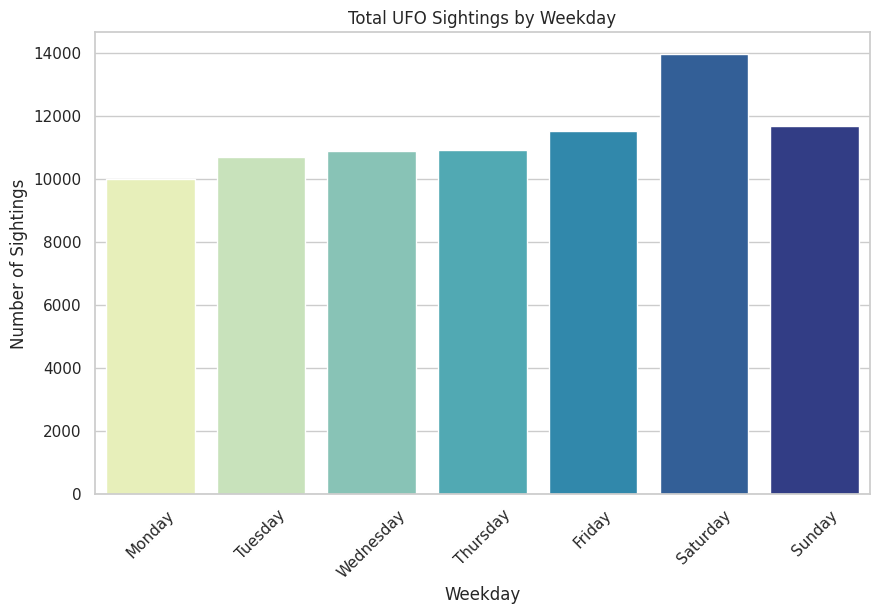

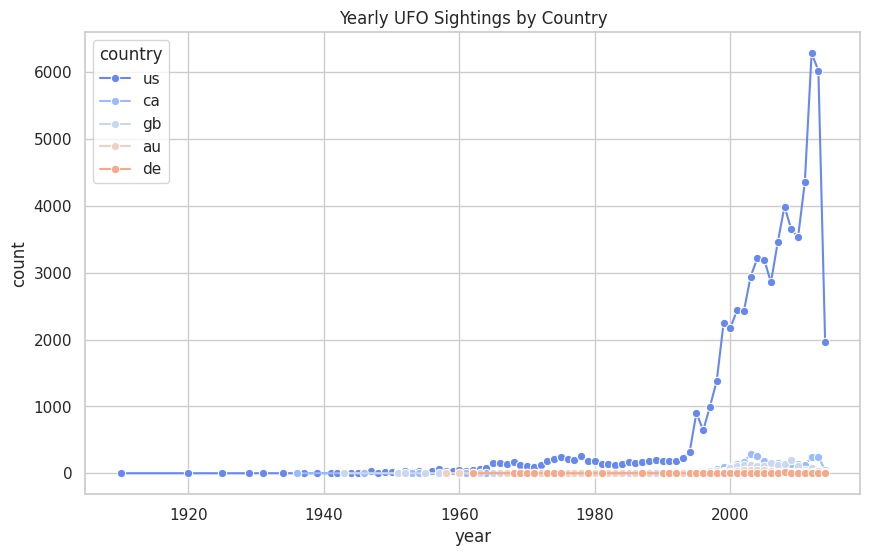

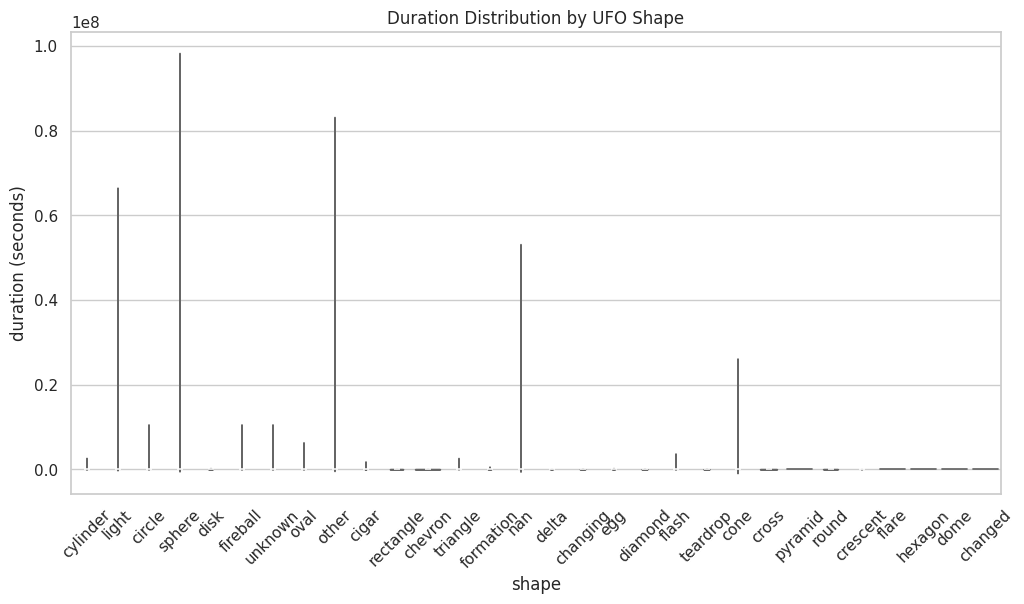

In [79]:

# 1. 데이터 불러오기

df = pd.read_csv("/home/yj/dev_ws/project_UFO/data/scrubbed.csv")  # 데이터 파일 경로
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['date_posted'] = pd.to_datetime(df['date posted'], errors='coerce')

# 필요한 컬럼 정리
df = df[['datetime','city','state','country','shape','duration (seconds)',
         'comments','latitude','longitude ']].copy()
df.rename(columns={'longitude ':'longitude'}, inplace=True)

# 시간 관련 feature 추가

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.day_name()

# weekday × shape 히트맵

# 요일별 UFO 목격 수 합계
df_weekday = df.groupby('weekday').size().reset_index(name='count')

# 요일 순서 지정 (Mon~Sun)
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10,6))
sns.barplot(data=df_weekday, x='weekday', y='count', order=weekday_order, palette="YlGnBu")
plt.title("Total UFO Sightings by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Sightings")
plt.xticks(rotation=45)
plt.show()


# 시계열: 연도별 UFO sightings lineplot

df_year = df.groupby(['year','country']).size().reset_index(name='count')
plt.figure(figsize=(10,6))
sns.lineplot(data=df_year, x='year', y='count', hue='country', marker='o')
plt.title("Yearly UFO Sightings by Country")
plt.show()

# 숫자로 변환, 변환 실패 시 NaN
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# NaN 제거
df_map = df.dropna(subset=['latitude','longitude']).copy()

# Folium 지도: 목격 위치 표시

# 위도, 경도 없는 행 제거
df_map = df.dropna(subset=['latitude','longitude']).copy()
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # 미국 중심
for _, row in df_map.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['city']}, {row['state']} - {row['shape']}"
    ).add_to(m)
m.save("ufo_map.html")
m 

# shape를 문자열로 변환
df['shape'] = df['shape'].astype(str)

# duration을 숫자로 변환, 변환 실패 시 NaN
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce')

# 결측치 제거
df_violin = df.dropna(subset=['shape', 'duration (seconds)'])

# violin plot
plt.figure(figsize=(12,6))
sns.violinplot(data=df_violin, x='shape', y='duration (seconds)')
plt.xticks(rotation=45)
plt.title("Duration Distribution by UFO Shape")
plt.show()

m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # 미국 중심
for _, row in df_map.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['city']}, {row['state']} - {row['shape']}"
    ).add_to(m)

m.save("ufo_map.html")

/tmp/ipykernel_4850/543878579.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




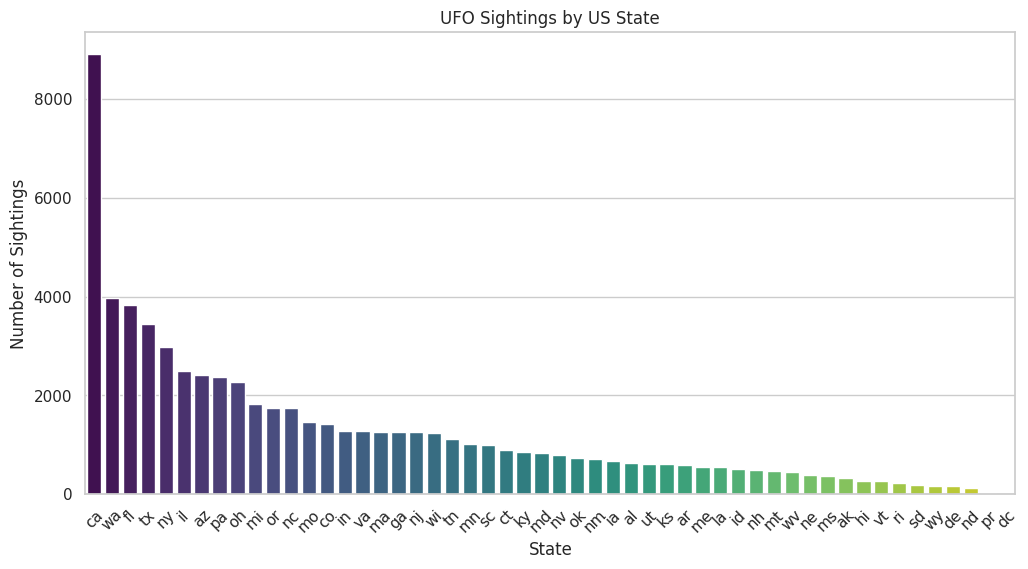

In [81]:
# 1미국 데이터만 필터링

df_us = df[df['country']=='us'].copy()

#  주별 sighting 횟수 계산

state_counts = df_us['state'].value_counts().reset_index()
state_counts.columns = ['state','count']

#  시각화 (Barplot)

plt.figure(figsize=(12,6))
sns.barplot(data=state_counts, x='state', y='count', palette="viridis")
plt.xticks(rotation=45)
plt.title("UFO Sightings by US State")
plt.ylabel("Number of Sightings")
plt.xlabel("State")
plt.show()

### 주 별 목격 사례 랭킹

In [87]:
# 미국 데이터만 필터링
df_us = df[df['country']=='us'].copy()
df_us['state'] = df_us['state'].str.upper()  # 대문자 변환

# 주별 top1 shape 계산
df_top_shape = df_us.groupby(['state','shape']).size().reset_index(name='count')
df_top_shape = df_top_shape.sort_values(['state','count'], ascending=[True, False])
df_top1 = df_top_shape.groupby('state').first().reset_index()  # 각 주별 top1

# Plotly Choropleth
# 색상은 목격수(count)를 사용하고, hover text에 top shape 표시
df_top1['hover_text'] = df_top1.apply(lambda x: f"State: {x['state']}<br>Top Shape: {x['shape']}<br>Sightings: {x['count']}", axis=1)

fig = px.choropleth(
    df_top1,
    locations='state',
    locationmode='USA-states',
    color='count',
    hover_name='state',
    hover_data={'count':False, 'state':False, 'hover_text':True},
    color_continuous_scale="Reds",
    scope="usa"
)

# hover text 적용
fig.update_traces(hovertemplate=df_top1['hover_text'])

fig.update_layout(title_text='US UFO Sightings by State (Top1 Shape)')
fig.show()

### 주 별로 목격사례 지도에 시각화

In [ ]:
import plotly.graph_objects as go

# 1미국 데이터만 필터링
df_us = df[df['country']=='us'].copy()
df_us['state'] = df_us['state'].str.upper()  # 대문자 변환

# 2주별 top1 shape 계산
df_top_shape = df_us.groupby(['state','shape']).size().reset_index(name='count')
df_top_shape = df_top_shape.sort_values(['state','count'], ascending=[True, False])
df_top1 = df_top_shape.groupby('state').first().reset_index()

# 3미국 주 중심 좌표
us_states_centers = {
    'AL':[32.806671, -86.791130],'AK':[61.370716, -152.404419],'AZ':[33.729759, -111.431221],
    'AR':[34.969704, -92.373123],'CA':[36.116203, -119.681564],'CO':[39.059811, -105.311104],
    'CT':[41.597782, -72.755371],'DE':[39.318523, -75.507141],'FL':[27.766279, -81.686783],
    'GA':[33.040619, -83.643074],'HI':[21.094318, -157.498337],'ID':[44.240459, -114.478828],
    'IL':[40.349457, -88.986137],'IN':[39.849426, -86.258278],'IA':[42.011539, -93.210526],
    'KS':[38.526600, -96.726486],'KY':[37.668140, -84.670067],'LA':[31.169546, -91.867805],
    'ME':[44.693947, -69.381927],'MD':[39.063946, -76.802101],'MA':[42.230171, -71.530106],
    'MI':[43.326618, -84.536095],'MN':[45.694454, -93.900192],'MS':[32.741646, -89.678696],
    'MO':[38.456085, -92.288368],'MT':[46.921925, -110.454353],'NE':[41.125370, -98.268082],
    'NV':[38.313515, -117.055374],'NH':[43.452492, -71.563896],'NJ':[40.298904, -74.521011],
    'NM':[34.840515, -106.248482],'NY':[42.165726, -74.948051],'NC':[35.630066, -79.806419],
    'ND':[47.528912, -99.784012],'OH':[40.388783, -82.764915],'OK':[35.565342, -96.928917],
    'OR':[44.572021, -122.070938],'PA':[40.590752, -77.209755],'RI':[41.680893, -71.511780],
    'SC':[33.856892, -80.945007],'SD':[44.299782, -99.438828],'TN':[35.747845, -86.692345],
    'TX':[31.054487, -97.563461],'UT':[40.150032, -111.862434],'VT':[44.045876, -72.710686],
    'VA':[37.769337, -78.169968],'WA':[47.400902, -121.490494],'WV':[38.491226, -80.954456],
    'WI':[44.268543, -89.616508],'WY':[42.755966, -107.302490]
}

df_top1['lat'] = df_top1['state'].map(lambda x: us_states_centers.get(x,[None,None])[0])
df_top1['lon'] = df_top1['state'].map(lambda x: us_states_centers.get(x,[None,None])[1])
df_top1 = df_top1.dropna(subset=['lat','lon'])

# 4Scatter Geo로 텍스트만 표시
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode='USA-states',
    lon=df_top1['lon'],
    lat=df_top1['lat'],
    text=df_top1['shape'],  # 지도에 글자 표시
    mode='text',
    textfont=dict(size=12, color='red')
))

fig.update_layout(
    title_text="US UFO Sightings: Top1 Shape per State",
    geo=dict(
        scope='usa',
        showland=True,
        landcolor="lightgray"
    )
)

fig.show()

### TOP1 shape가 다 light라 top1만 제외

In [ ]:
# 주별 shape별 count 계산
df_shape_count = df_us.groupby(['state','shape']).size().reset_index(name='count')
df_shape_count = df_shape_count.sort_values(['state','count'], ascending=[True, False])

# top1이 'light'면 제외하고 top2 선택
df_top = pd.DataFrame()
for state, group in df_shape_count.groupby('state'):
    if group.iloc[0]['shape'] == 'light':
        if len(group) > 1:
            df_top = pd.concat([df_top, group.iloc[[1]]])
    else:
        df_top = pd.concat([df_top, group.iloc[[0]]])

df_top = df_top.reset_index(drop=True)

# 미국 주 중심 좌표
us_states_centers = {
    'AL':[32.806671, -86.791130],'AK':[61.370716, -152.404419],'AZ':[33.729759, -111.431221],
    'AR':[34.969704, -92.373123],'CA':[36.116203, -119.681564],'CO':[39.059811, -105.311104],
    'CT':[41.597782, -72.755371],'DE':[39.318523, -75.507141],'FL':[27.766279, -81.686783],
    'GA':[33.040619, -83.643074],'HI':[21.094318, -157.498337],'ID':[44.240459, -114.478828],
    'IL':[40.349457, -88.986137],'IN':[39.849426, -86.258278],'IA':[42.011539, -93.210526],
    'KS':[38.526600, -96.726486],'KY':[37.668140, -84.670067],'LA':[31.169546, -91.867805],
    'ME':[44.693947, -69.381927],'MD':[39.063946, -76.802101],'MA':[42.230171, -71.530106],
    'MI':[43.326618, -84.536095],'MN':[45.694454, -93.900192],'MS':[32.741646, -89.678696],
    'MO':[38.456085, -92.288368],'MT':[46.921925, -110.454353],'NE':[41.125370, -98.268082],
    'NV':[38.313515, -117.055374],'NH':[43.452492, -71.563896],'NJ':[40.298904, -74.521011],
    'NM':[34.840515, -106.248482],'NY':[42.165726, -74.948051],'NC':[35.630066, -79.806419],
    'ND':[47.528912, -99.784012],'OH':[40.388783, -82.764915],'OK':[35.565342, -96.928917],
    'OR':[44.572021, -122.070938],'PA':[40.590752, -77.209755],'RI':[41.680893, -71.511780],
    'SC':[33.856892, -80.945007],'SD':[44.299782, -99.438828],'TN':[35.747845, -86.692345],
    'TX':[31.054487, -97.563461],'UT':[40.150032, -111.862434],'VT':[44.045876, -72.710686],
    'VA':[37.769337, -78.169968],'WA':[47.400902, -121.490494],'WV':[38.491226, -80.954456],
    'WI':[44.268543, -89.616508],'WY':[42.755966, -107.302490]
}

df_top['lat'] = df_top['state'].map(lambda x: us_states_centers.get(x,[None,None])[0])
df_top['lon'] = df_top['state'].map(lambda x: us_states_centers.get(x,[None,None])[1])
df_top = df_top.dropna(subset=['lat','lon'])

# 지도에 텍스트 표시
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode='USA-states',
    lon=df_top['lon'],
    lat=df_top['lat'],
    text=df_top['shape'],
    mode='text',
    textfont=dict(size=12, color='blue')
))

fig.update_layout(
    title_text="US UFO Sightings by State (Top2 if Top1 is 'light')",
    geo=dict(
        scope='usa',
        showland=True,
        landcolor="lightgray"
    )
)

fig.show()


In [88]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# ------------------------
# 데이터 불러오기
# ------------------------
file_path = '/home/yj/dev_ws/project_UFO/data/scrubbed.csv'
df = pd.read_csv(file_path, low_memory=False)

# country 컬럼 전처리
df['country'] = df['country'].str.upper()

# ------------------------
# 1️⃣ 국가별 UFO sightings (세계 지도)
# ------------------------
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country_iso2', 'count']

iso2_to_iso3 = {
    'US': 'USA', 'CA': 'CAN', 'GB': 'GBR', 'AU': 'AUS', 'DE': 'DEU'
}
country_counts['country_iso3'] = country_counts['country_iso2'].map(iso2_to_iso3)
country_counts_mapped = country_counts.dropna(subset=['country_iso3'])

fig_world = px.choropleth(
    country_counts_mapped,
    locations='country_iso3',
    color='count',
    hover_name='country_iso2',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='UFO numbers by Country',
    locationmode='ISO-3'
)

# HTML로 저장 (Standalone)
fig_world.write_html("ufo_world_map.html", include_plotlyjs='cdn', full_html=True)

# ------------------------
# 2️⃣ 미국 주별 top shape 표시 (Top2 if Top1 is 'light')
# ------------------------
df_us = df[df['country']=='US'].copy()
df_us['state'] = df_us['state'].str.upper()

# shape별 count
df_shape_count = df_us.groupby(['state','shape']).size().reset_index(name='count')
df_shape_count = df_shape_count.sort_values(['state','count'], ascending=[True, False])

# top1이 'light'면 top2
df_top = pd.DataFrame()
for state, group in df_shape_count.groupby('state'):
    if group.iloc[0]['shape'].lower() == 'light':
        if len(group) > 1:
            df_top = pd.concat([df_top, group.iloc[[1]]])
    else:
        df_top = pd.concat([df_top, group.iloc[[0]]])
df_top = df_top.reset_index(drop=True)

# 미국 주 중심 좌표
us_states_centers = {
    'AL':[32.806671, -86.791130],'AK':[61.370716, -152.404419],'AZ':[33.729759, -111.431221],
    'AR':[34.969704, -92.373123],'CA':[36.116203, -119.681564],'CO':[39.059811, -105.311104],
    'CT':[41.597782, -72.755371],'DE':[39.318523, -75.507141],'FL':[27.766279, -81.686783],
    'GA':[33.040619, -83.643074],'HI':[21.094318, -157.498337],'ID':[44.240459, -114.478828],
    'IL':[40.349457, -88.986137],'IN':[39.849426, -86.258278],'IA':[42.011539, -93.210526],
    'KS':[38.526600, -96.726486],'KY':[37.668140, -84.670067],'LA':[31.169546, -91.867805],
    'ME':[44.693947, -69.381927],'MD':[39.063946, -76.802101],'MA':[42.230171, -71.530106],
    'MI':[43.326618, -84.536095],'MN':[45.694454, -93.900192],'MS':[32.741646, -89.678696],
    'MO':[38.456085, -92.288368],'MT':[46.921925, -110.454353],'NE':[41.125370, -98.268082],
    'NV':[38.313515, -117.055374],'NH':[43.452492, -71.563896],'NJ':[40.298904, -74.521011],
    'NM':[34.840515, -106.248482],'NY':[42.165726, -74.948051],'NC':[35.630066, -79.806419],
    'ND':[47.528912, -99.784012],'OH':[40.388783, -82.764915],'OK':[35.565342, -96.928917],
    'OR':[44.572021, -122.070938],'PA':[40.590752, -77.209755],'RI':[41.680893, -71.511780],
    'SC':[33.856892, -80.945007],'SD':[44.299782, -99.438828],'TN':[35.747845, -86.692345],
    'TX':[31.054487, -97.563461],'UT':[40.150032, -111.862434],'VT':[44.045876, -72.710686],
    'VA':[37.769337, -78.169968],'WA':[47.400902, -121.490494],'WV':[38.491226, -80.954456],
    'WI':[44.268543, -89.616508],'WY':[42.755966, -107.302490]
}

df_top['lat'] = df_top['state'].map(lambda x: us_states_centers.get(x,[None,None])[0])
df_top['lon'] = df_top['state'].map(lambda x: us_states_centers.get(x,[None,None])[1])
df_top = df_top.dropna(subset=['lat','lon'])

# Scattergeo 텍스트 지도
fig_us = go.Figure()
fig_us.add_trace(go.Scattergeo(
    locationmode='USA-states',
    lon=df_top['lon'],
    lat=df_top['lat'],
    text=df_top['shape'],
    mode='text',
    textfont=dict(size=12, color='blue')
))

fig_us.update_layout(
    title_text="US UFO Sightings by State (Top2 if Top1 is 'light')",
    geo=dict(scope='usa', showland=True, landcolor="lightgray")
)

# HTML로 저장 (Standalone)
fig_us.write_html("ufo_us_top_shape_map.html", include_plotlyjs='cdn', full_html=True)

print("✅ HTML export 완료. 파일을 브라우저에서 열면 인터랙티브 그래프 확인 가능")


✅ HTML export 완료. 파일을 브라우저에서 열면 인터랙티브 그래프 확인 가능
